In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("F:\PGDDS\PGD_Data_Science\csv_data\wine_quality\wineQualityReds.csv")

In [3]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [5]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [6]:
df=df.drop_duplicates()

In [7]:
df.duplicated().sum()

0

In [8]:
X=df.drop("quality",axis=1)

In [9]:
y=df['quality']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
model = GradientBoostingClassifier()

In [14]:
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [15]:
y_pred = model.predict(X_test)

In [16]:
y_pred

array([5, 6, 6, 5, 6, 7, 6, 5, 6, 6, 7, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6,
       5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 7, 4, 6, 6, 5,
       6, 5, 5, 5, 5, 6, 6, 6, 7, 6, 7, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6,
       5, 5, 5, 7, 5, 8, 6, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5,
       6, 6, 6, 3, 5, 5, 6, 6, 5, 7, 6, 5, 5, 5, 5, 5, 6, 5, 6, 7, 7, 6,
       6, 6, 5, 5, 5, 5, 3, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5,
       6, 5, 5, 4, 6, 6, 6, 5, 5, 5, 7, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5,
       5, 6, 6, 4, 6, 6, 4, 5, 5, 6, 5, 7, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6,
       5, 5, 5, 6, 5, 6, 4, 5, 5, 6, 5, 5, 5, 6, 6, 5, 7, 6, 6, 5, 7, 5,
       6, 7, 5, 7, 5, 7, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 7, 5, 6, 7, 5, 6,
       5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 8, 6, 6, 3, 5, 5, 6,
       5, 5, 6, 3, 5, 6, 6, 7, 5, 5, 7, 6, 6, 6, 5, 5, 6, 6, 7, 6, 5, 5,
       6, 6, 6, 7, 5, 7, 6, 5], dtype=int64)

In [17]:
model.score(X_test, y_test)

0.6286764705882353

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

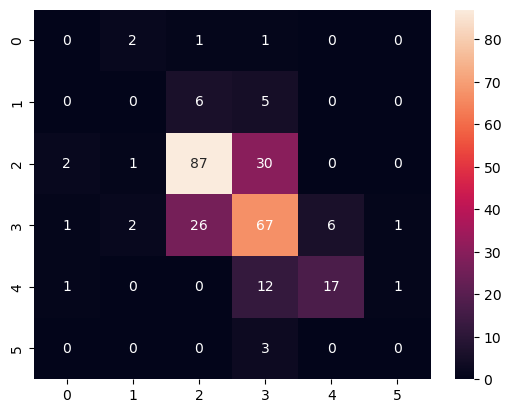

In [20]:
import seaborn as sns
sns.heatmap(cm, annot = True)

- Creating hyperparametr tunninng

In [21]:
model = GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5)

In [22]:
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [23]:
model.score(X_test, y_test)

0.6323529411764706

In [24]:
predicted_y = model.predict(X_test)

In [25]:
cm = confusion_matrix(y_test, predicted_y)

<AxesSubplot:>

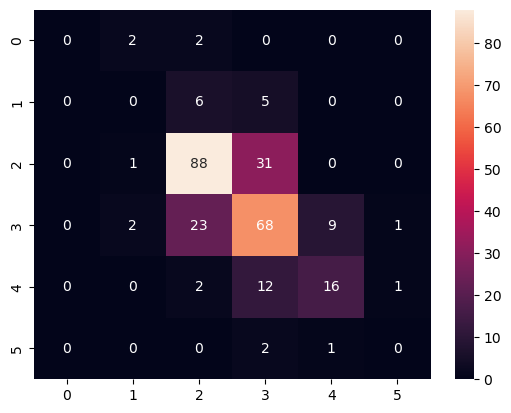

In [26]:
import seaborn as sns
sns.heatmap(cm, annot = True)

In [28]:
import xgboost as xbg

In [29]:
boost = xbg.XGBClassifier()

In [33]:
y_train.unique()

array([7, 5, 6, 4, 3, 8], dtype=int64)

In [37]:
import numpy as np
label_map = {3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5}
y_train = np.array([label_map[label] for label in y_train])

In [38]:
boost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [41]:
import numpy as np
label_map = {3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5}
y_test = np.array([label_map[label] for label in y_test])

In [42]:
y_test

array([2, 3, 4, 2, 1, 4, 2, 2, 3, 2, 4, 3, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 3, 3, 2, 3, 2, 3, 2, 4, 2, 2, 2, 2,
       3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 1, 2, 2, 3, 2, 3, 2, 3,
       2, 2, 3, 3, 2, 4, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2,
       2, 2, 2, 3, 2, 2, 2, 3, 0, 4, 3, 2, 2, 2, 2, 2, 3, 2, 3, 4, 3, 3,
       3, 1, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 4, 2, 3, 2,
       3, 3, 3, 0, 4, 3, 3, 2, 2, 2, 4, 3, 2, 3, 3, 2, 3, 2, 2, 1, 3, 1,
       2, 4, 2, 3, 3, 4, 3, 2, 1, 3, 2, 4, 3, 2, 3, 3, 5, 2, 3, 3, 4, 1,
       2, 2, 2, 3, 3, 3, 0, 2, 2, 2, 1, 2, 1, 2, 2, 3, 4, 2, 2, 3, 4, 2,
       4, 4, 2, 4, 2, 4, 2, 3, 3, 3, 2, 3, 5, 5, 3, 2, 3, 2, 4, 4, 2, 3,
       3, 2, 2, 3, 0, 2, 3, 2, 3, 2, 3, 3, 4, 2, 3, 3, 4, 3, 4, 2, 2, 3,
       2, 3, 3, 2, 2, 3, 2, 4, 3, 2, 3, 4, 3, 3, 1, 2, 3, 3, 4, 2, 2, 2,
       3, 2, 3, 4, 3, 4, 4, 3])

In [43]:
boost.score(X_test, y_test)

0.6066176470588235

In [44]:
prediction = boost.predict(X_test)

In [45]:
prediction

array([2, 3, 3, 3, 3, 4, 3, 2, 3, 3, 4, 3, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3,
       2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 1, 3, 3, 2, 3, 2, 4, 1, 3, 3, 2,
       3, 2, 2, 2, 2, 3, 3, 3, 4, 3, 4, 2, 3, 2, 2, 2, 2, 2, 2, 4, 2, 3,
       2, 2, 2, 4, 2, 5, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2,
       3, 3, 3, 3, 2, 2, 3, 3, 2, 4, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 3,
       3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 2, 2, 3, 3, 3, 2, 2, 2, 4, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2,
       2, 3, 3, 2, 3, 3, 1, 3, 2, 4, 2, 4, 2, 2, 4, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2,
       3, 3, 2, 5, 2, 4, 2, 4, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 4, 4, 2, 3,
       3, 3, 2, 3, 1, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 4, 3, 3, 2, 2, 2, 2,
       2, 3, 4, 2, 2, 3, 3, 4, 3, 2, 4, 3, 3, 3, 3, 2, 3, 1, 4, 2, 2, 2,
       2, 3, 3, 4, 2, 4, 3, 2], dtype=int64)

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
cm = confusion_matrix(y_test, prediction)

<AxesSubplot:>

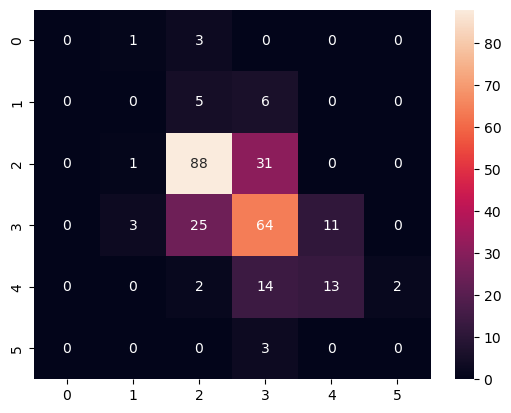

In [48]:
import seaborn as sns
sns.heatmap(cm, annot = True)